In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pwd

'/home/jovyan/UCLA_CSX_450_2_2018_W/Final_Iowa/ipynb'

In [3]:
%run ../src/load_data.py

In [4]:
whos DataFrame

Variable                     Type         Data/Info
---------------------------------------------------
housing_df                   DataFrame         MSSubClass MSZoning <...>n[1451 rows x 80 columns]
housing_ouliers_removed_df   DataFrame         MSSubClass MSZoning <...>n[1437 rows x 80 columns]
listing_df                   DataFrame            Id Street Alley  <...>n[1460 rows x 62 columns]
numeric_df                   DataFrame          LotFrontage  LotAre<...>n[1451 rows x 23 columns]
numeric_final_df             DataFrame          LotFrontage   LotAr<...>n[1437 rows x 23 columns]
numeric_log_df               DataFrame          LotFrontage    LotA<...>n[1451 rows x 23 columns]
numeric_log_sc_df            DataFrame          LotFrontage   LotAr<...>n[1451 rows x 23 columns]
numeric_sc_df                DataFrame          LotFrontage   LotAr<...>n[1451 rows x 23 columns]
sale_df                      DataFrame            Id  MoSold  YrSol<...>\n[1460 rows x 6 columns]
zoning_df     

#### One Hot Encoding

In [5]:
housing_cat_df = housing_df.select_dtypes(include = ['category'])

In [6]:
dum_cat_df = pd.get_dummies(housing_cat_df,prefix_sep='_')

In [7]:
final_feature_df = pd.merge(dum_cat_df, numeric_log_sc_df, left_index=True, right_index=True)

Select Top 10 Column from Random Forest

In [8]:
final_feature_selected = ['GrLivArea','LotArea','FirstFlrSF','GarageArea','BsmtUnfSF','LotFrontage','YearBuilt','YearRemodAdd','BsmtFinSF1','OpenPorchSF']

In [9]:
housing_pca_df = final_feature_df[final_feature_selected]

In [10]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(housing_pca_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

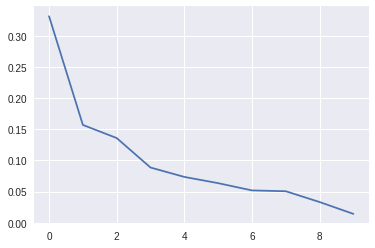

In [11]:
plt.plot(pca.explained_variance_ratio_)

In [12]:
pca = PCA(6)
pca.fit(housing_pca_df)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [13]:
cd ..

/home/jovyan/UCLA_CSX_450_2_2018_W/Final_Iowa


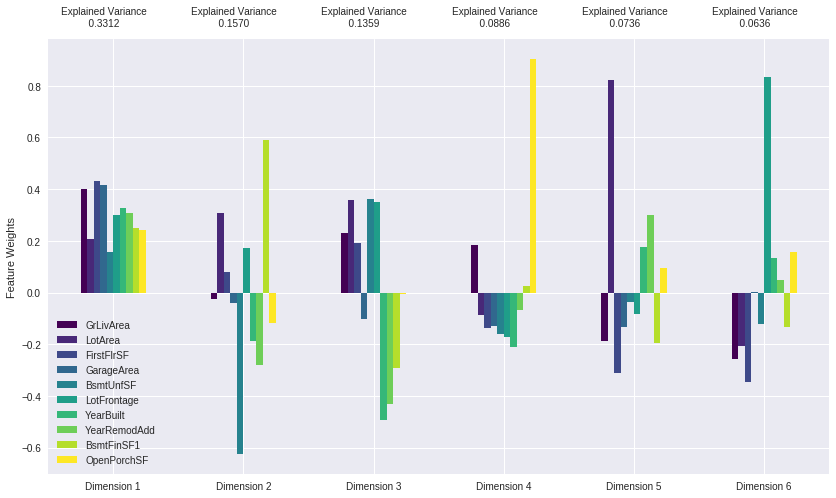

In [24]:
import lib.viz_helper as viz
import lib.visuals as vs
pca_df = viz.pca_results(housing_pca_df, pca)

In [25]:
housing_pca_df.cov()

,GrLivArea,LotArea,FirstFlrSF,GarageArea,BsmtUnfSF,LotFrontage,YearBuilt,YearRemodAdd,BsmtFinSF1,OpenPorchSF
GrLivArea,1.000000,0.261152,0.565895,0.469396,0.240770,0.368349,0.199621,0.288569,0.205944,0.330746
LotArea,0.261152,1.000000,0.295977,0.180767,-0.004250,0.306918,0.015708,0.015190,0.213081,0.086278
FirstFlrSF,0.565895,0.295977,1.000000,0.490839,0.318053,0.415154,0.285655,0.243464,0.442838,0.210229
GarageArea,0.469396,0.180767,0.490839,1.000000,0.183865,0.323352,0.478948,0.371088,0.295374,0.238781
BsmtUnfSF,0.240770,-0.004250,0.318053,0.183865,1.000000,0.119975,0.150218,0.182219,-0.496605,0.130046
LotFrontage,0.368349,0.306918,0.415154,0.323352,0.119975,1.000000,0.117313,0.082311,0.217204,0.135262
YearBuilt,0.199621,0.015708,0.285655,0.478948,0.150218,0.117313,1.000000,0.590324,0.250209,0.185758
YearRemodAdd,0.288569,0.015190,0.243464,0.371088,0.182219,0.082311,0.590324,1.000000,0.128422,0.224140
BsmtFinSF1,0.205944,0.213081,0.442838,0.295374,-0.496605,0.217204,0.250209,0.128422,1.000000,0.107279
OpenPorchSF,0.330746,0.086278,0.210229,0.238781,0.130046,0.135262,0.185758,0.224140,0.107279,1.000000


In [26]:
whos DataFrame

Variable                     Type         Data/Info
---------------------------------------------------
df_gelman                    DataFrame          GrLivArea   LotArea<...>n[1451 rows x 10 columns]
df_original                  DataFrame          GrLivArea   LotArea<...>n[1451 rows x 10 columns]
df_standard                  DataFrame          GrLivArea   LotArea<...>n[1451 rows x 10 columns]
dum_cat_df                   DataFrame          MSSubClass_20  MSSu<...>[1451 rows x 359 columns]
final_feature_df             DataFrame          MSSubClass_20  MSSu<...>[1451 rows x 382 columns]
housing_cat_df               DataFrame         MSSubClass MSZoning <...>n[1451 rows x 56 columns]
housing_df                   DataFrame         MSSubClass MSZoning <...>n[1451 rows x 80 columns]
housing_ouliers_removed_df   DataFrame         MSSubClass MSZoning <...>n[1437 rows x 80 columns]
housing_pca_df               DataFrame          GrLivArea   LotArea<...>n[1451 rows x 10 columns]
listing_df    

In [27]:
df_original = housing_pca_df.sample(frac=1)

In [28]:
def apply_scale(dataframe, scaling_function):
    numerical_df = dataframe.select_dtypes(include=[float])
    print(numerical_df.columns)
    numerical_df = scaling_function(numerical_df)
    tmp_df = dataframe.copy()
    tmp_df[numerical_df.columns] = numerical_df
    return tmp_df

def gelman_scale(dataframe):
    return (dataframe - dataframe.mean())/(2*dataframe.std())

def standard_scale(dataframe):
    return (dataframe - dataframe.mean())/(dataframe.std())

df_gelman = apply_scale(df_original, gelman_scale)
df_standard = apply_scale(df_original, standard_scale)

Index(['GrLivArea', 'LotArea', 'FirstFlrSF', 'GarageArea', 'BsmtUnfSF',
       'LotFrontage', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
       'OpenPorchSF'],
      dtype='object')
Index(['GrLivArea', 'LotArea', 'FirstFlrSF', 'GarageArea', 'BsmtUnfSF',
       'LotFrontage', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
       'OpenPorchSF'],
      dtype='object')


In [29]:
df_original.head()

,GrLivArea,LotArea,FirstFlrSF,GarageArea,BsmtUnfSF,LotFrontage,YearBuilt,YearRemodAdd,BsmtFinSF1,OpenPorchSF
Id,,,,,,,,,,
731,0.193659,-0.512240,1.180378,0.632552,-0.344174,-1.407907,0.791899,0.544267,1.620059,1.598203
401,-0.430153,0.445832,0.328436,0.128284,-0.210753,-1.453277,0.825023,0.544267,0.754827,-0.248599
280,0.965816,-0.050316,-0.014419,0.151630,0.454090,0.588378,0.195681,-0.375771,-0.110405,1.068383
462,-0.721139,-0.331013,-1.523500,0.483140,-1.282644,-0.455135,-1.162373,1.076920,-0.202638,-0.702730
1051,-0.403527,-0.151587,0.364799,-0.170541,1.661664,0.134677,1.189378,1.076920,-0.971245,-0.369700


In [30]:
pca_original = PCA()
pca_gelman = PCA()
pca_standard = PCA()
pca_original.fit(df_original)
pca_gelman.fit(df_gelman)
pca_standard.fit(df_standard)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

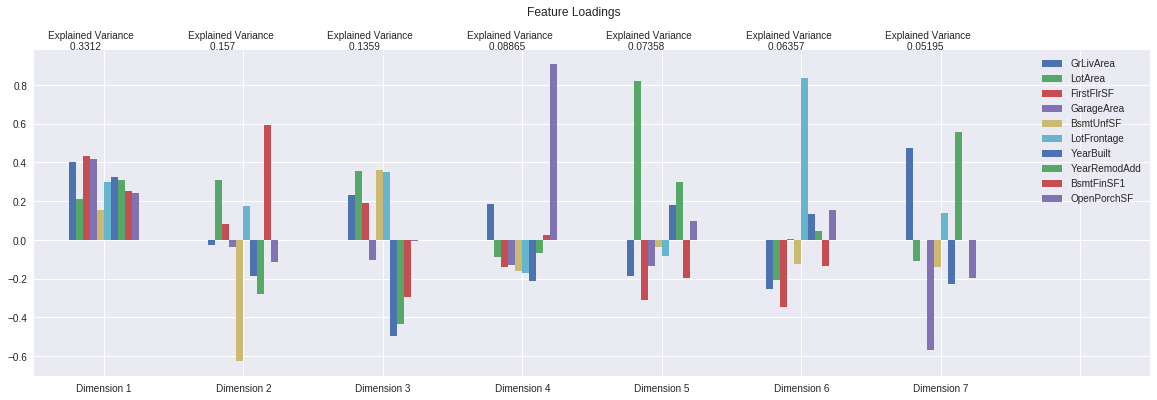

In [31]:
original_loading_plot = vs.FeatureLoadingsPlot(df_original, pca_original,7)
original_loading_plot.display_segments()

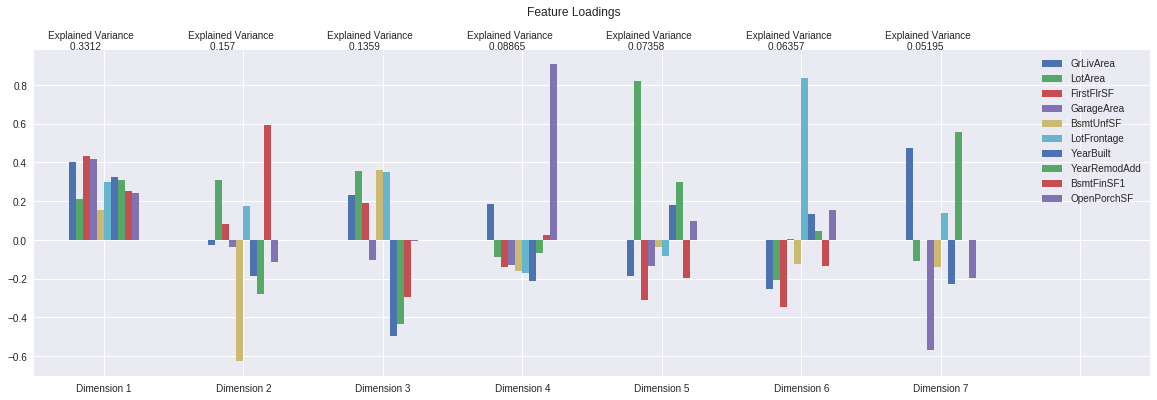

In [32]:
gelman_loading_plot = vs.FeatureLoadingsPlot(df_gelman, pca_gelman,7)
gelman_loading_plot.display_segments()

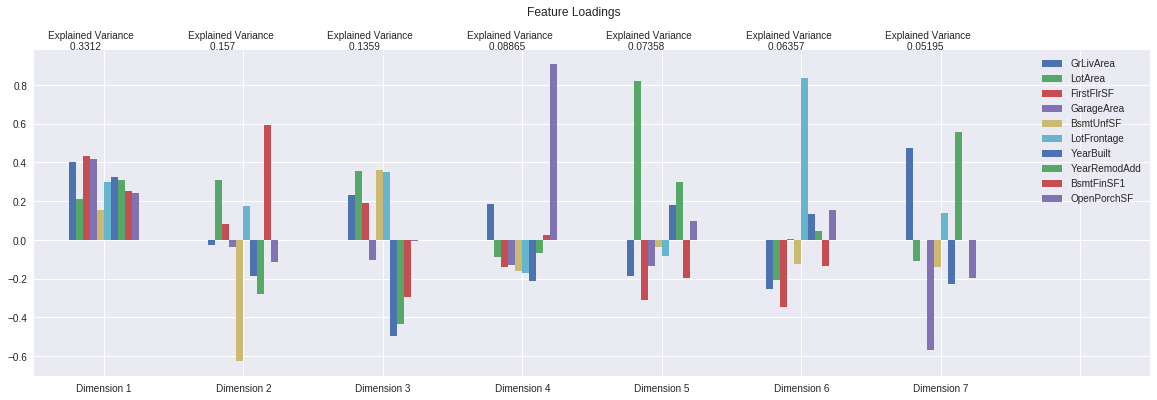

In [33]:
standard_loading_plot = vs.FeatureLoadingsPlot(df_standard, pca_standard,7)
standard_loading_plot.display_segments()

In [34]:
df_original_numerical = df_original.select_dtypes([int,float])
df_gelman_numerical = df_gelman.select_dtypes([int,float])
df_standard_numerical = df_standard.select_dtypes([int,float])

In [35]:
pca_original_numerical = PCA()
pca_gelman_numerical = PCA()
pca_standard_numerical = PCA()

In [40]:
pca_original_numerical.fit(df_original_numerical)
pca_gelman_numerical.fit(df_gelman_numerical)
pca_standard_numerical.fit(df_standard_numerical)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [43]:
df_original_numerical.head()

,GrLivArea,LotArea,FirstFlrSF,GarageArea,BsmtUnfSF,LotFrontage,YearBuilt,YearRemodAdd,BsmtFinSF1,OpenPorchSF
Id,,,,,,,,,,
731,0.193659,-0.512240,1.180378,0.632552,-0.344174,-1.407907,0.791899,0.544267,1.620059,1.598203
401,-0.430153,0.445832,0.328436,0.128284,-0.210753,-1.453277,0.825023,0.544267,0.754827,-0.248599
280,0.965816,-0.050316,-0.014419,0.151630,0.454090,0.588378,0.195681,-0.375771,-0.110405,1.068383
462,-0.721139,-0.331013,-1.523500,0.483140,-1.282644,-0.455135,-1.162373,1.076920,-0.202638,-0.702730
1051,-0.403527,-0.151587,0.364799,-0.170541,1.661664,0.134677,1.189378,1.076920,-0.971245,-0.369700


In [51]:
dims_5 = ['Dimension 1', 'Dimension 2', 'Dimension 3', 'Dimension 4', 'Dimension 5']
dims_10 = dims_5 + ['Dimension 6', 'Dimension 7' 'Dimentions 8', 'Dimension 9', 'Dimension 10', 'Dimension 11']

df_original_pca = pd.DataFrame(pca_original.transform(df_original))
df_original_pca.columns = dims_10

df_original_numerical_pca = pd.DataFrame(pca_original_numerical.transform(df_original_numerical))
df_original_numerical_pca.columns = dims_10

df_gelman_pca = pd.DataFrame(pca_gelman.transform(df_gelman))
df_gelman_pca.columns = dims_10

df_gelman_numerical_pca = pd.DataFrame(pca_gelman_numerical.transform(df_gelman_numerical))
df_gelman_numerical_pca.columns = dims_10

df_standard_pca = pd.DataFrame(pca_standard.transform(df_standard))
df_standard_pca.columns = dims_10

df_standard_numerical_pca = pd.DataFrame(pca_standard_numerical.transform(df_standard_numerical))
df_standard_numerical_pca.columns = dims_10

 67%|██████▋   | 2/3 [00:00<00:00, 10.23it/s]

For n_clusters = 2 the silhouette score is 0.21822250581725833.
For n_clusters = 3 the silhouette score is 0.21840036740542196.


100%|██████████| 3/3 [00:00<00:00,  9.50it/s]


For n_clusters = 4 the silhouette score is 0.159289038692192.


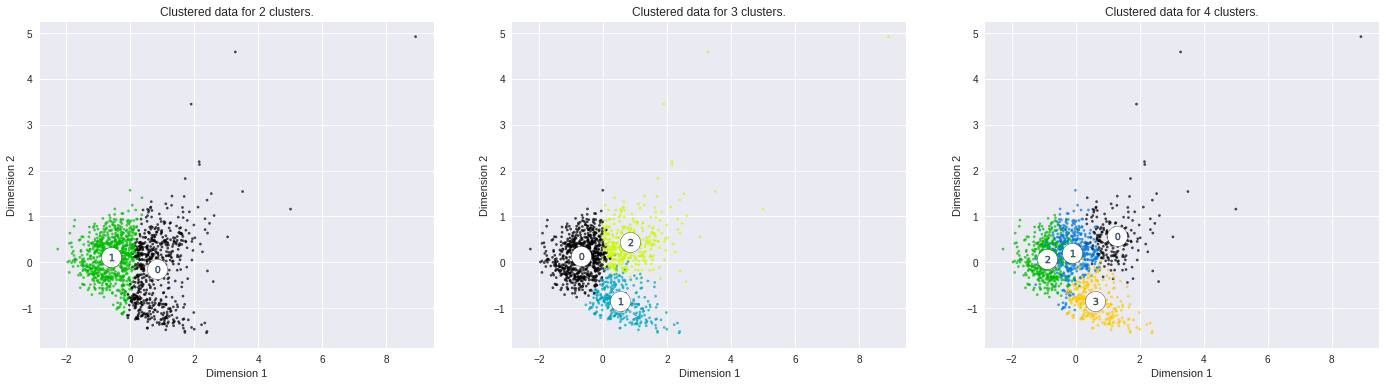

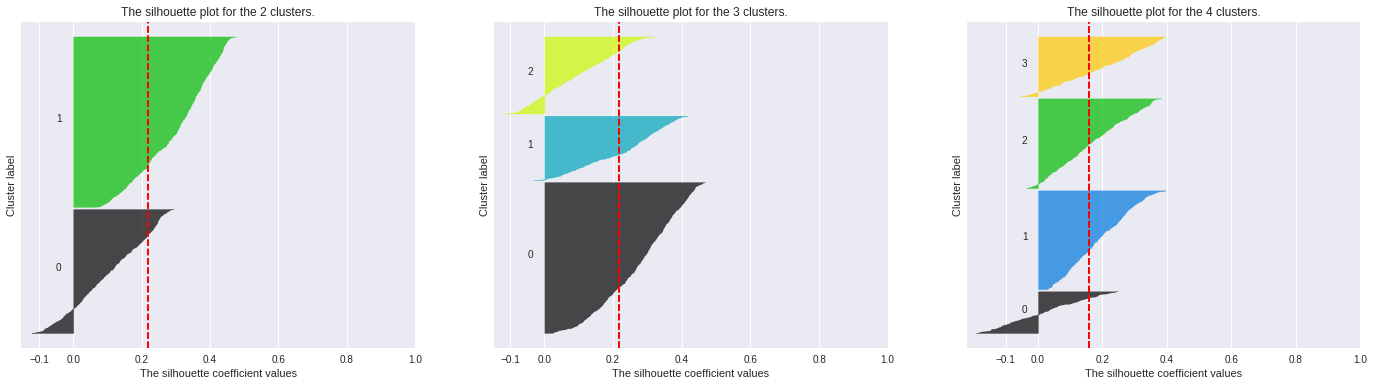

In [54]:
gelman_pca_clusters = vs.Clusters(df_gelman_pca, [2,3,4])
gelman_pca_clusters.cluster_plots()
gelman_pca_clusters.silhouette_plots()

 67%|██████▋   | 2/3 [00:00<00:00,  8.74it/s]

For n_clusters = 2 the silhouette score is 0.21822250581725833.
For n_clusters = 3 the silhouette score is 0.21835915694668737.


100%|██████████| 3/3 [00:00<00:00,  7.81it/s]


For n_clusters = 4 the silhouette score is 0.15957296506458635.


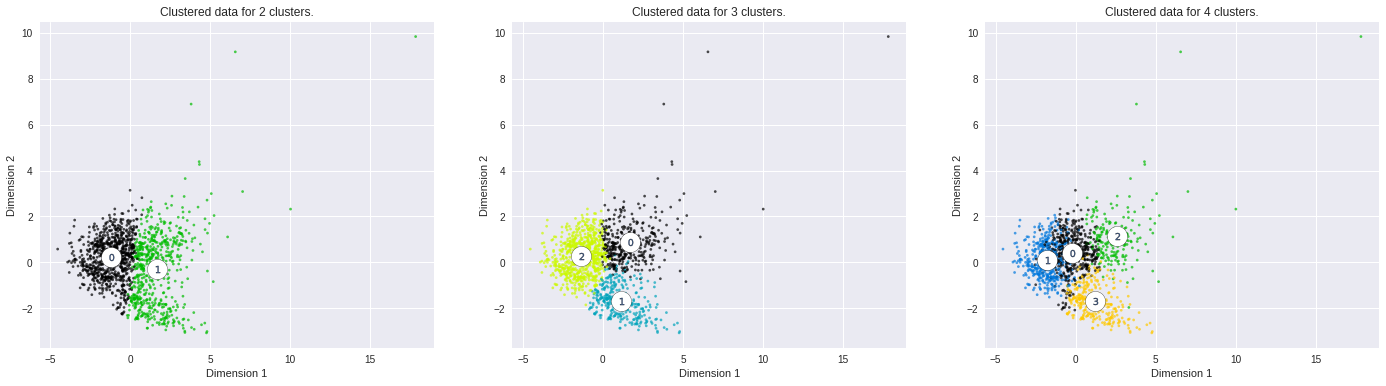

In [46]:
standard_pca_clusters = vs.Clusters(df_standard_pca, [2,3,4])
standard_pca_clusters.cluster_plots() 

 67%|██████▋   | 2/3 [00:00<00:00, 10.20it/s]

For n_clusters = 2 the silhouette score is 0.2179635146925544.
For n_clusters = 3 the silhouette score is 0.21875486548767778.


100%|██████████| 3/3 [00:00<00:00,  9.45it/s]


For n_clusters = 4 the silhouette score is 0.2210219893247227.


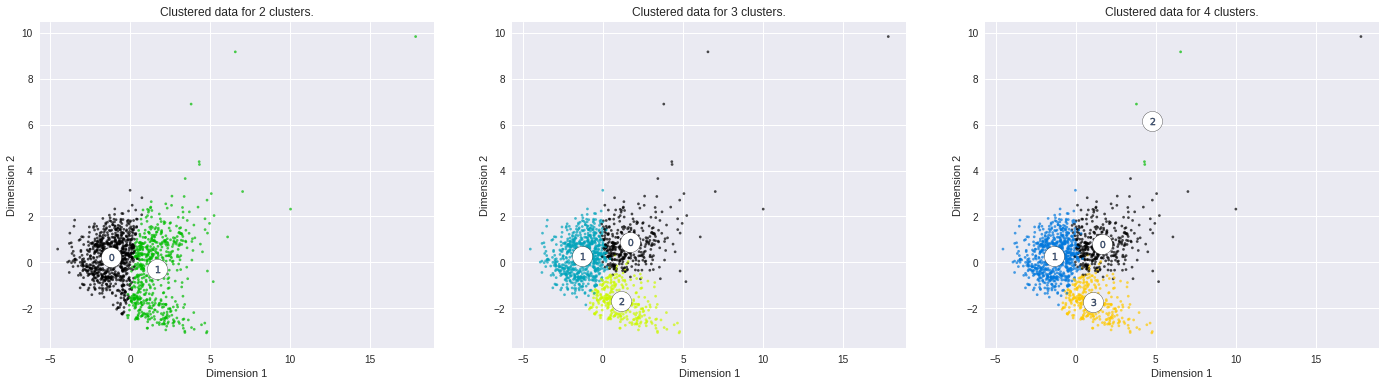

In [47]:
original_pca_clusters = vs.Clusters(df_original_pca, [2,3,4])
original_pca_clusters.cluster_plots()

 67%|██████▋   | 2/3 [00:00<00:00,  8.59it/s]

For n_clusters = 2 the silhouette score is 0.2179635146925347.
For n_clusters = 3 the silhouette score is 0.2179482037306283.


100%|██████████| 3/3 [00:00<00:00,  8.28it/s]


For n_clusters = 4 the silhouette score is 0.15943167986080886.


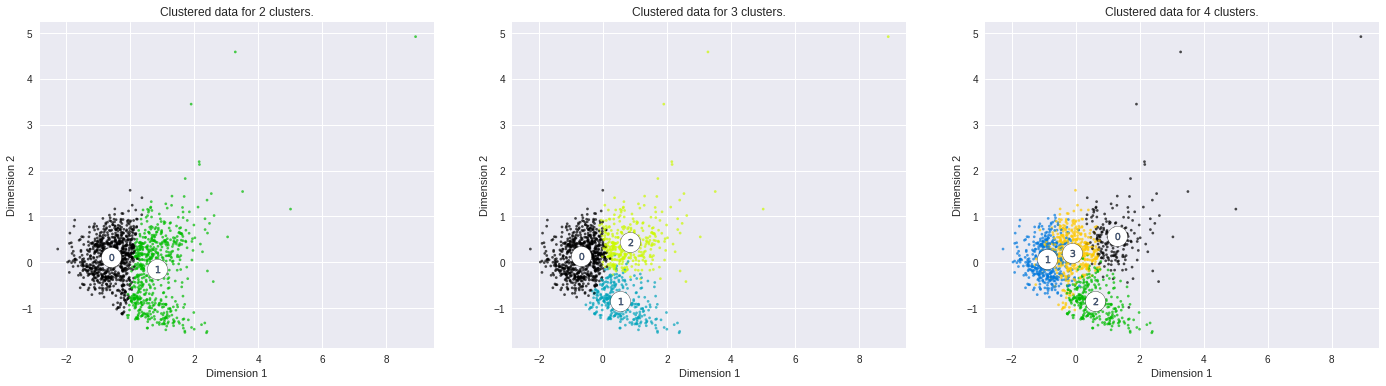

In [48]:
gelman_numerical_pca_clusters = vs.Clusters(df_gelman_numerical_pca, [2,3,4])
gelman_numerical_pca_clusters.cluster_plots()

 67%|██████▋   | 2/3 [00:00<00:00, 11.23it/s]

For n_clusters = 2 the silhouette score is 0.21820105316097846.
For n_clusters = 3 the silhouette score is 0.218376312267437.


100%|██████████| 3/3 [00:00<00:00, 10.26it/s]


For n_clusters = 4 the silhouette score is 0.21464344573737573.


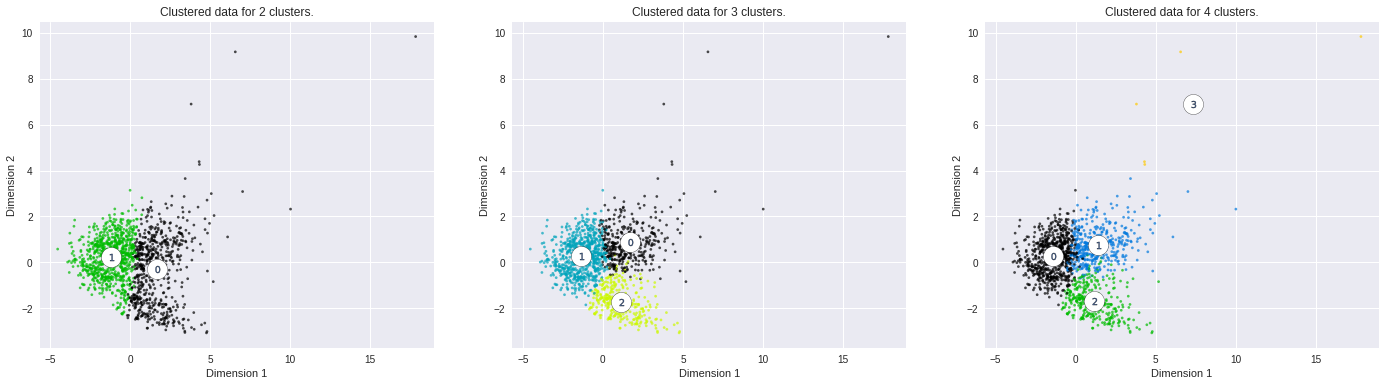

In [49]:
standard_numerical_pca_clusters = vs.Clusters(df_standard_numerical_pca, [2,3,4])
standard_numerical_pca_clusters.cluster_plots()

 67%|██████▋   | 2/3 [00:00<00:00, 10.02it/s]

For n_clusters = 2 the silhouette score is 0.2179635146925544.
For n_clusters = 3 the silhouette score is 0.21822329172308114.


100%|██████████| 3/3 [00:00<00:00,  8.60it/s]


For n_clusters = 4 the silhouette score is 0.15968936783091833.


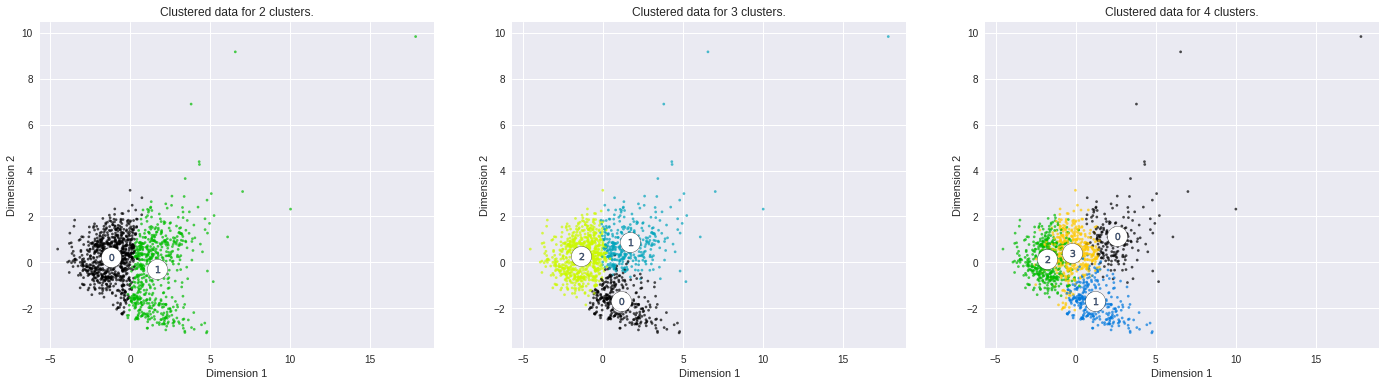

In [50]:
original_numerical_pca_clusters = vs.Clusters(df_original_numerical_pca, [2,3,4])
original_numerical_pca_clusters.cluster_plots()